In [1]:
# Se importan Instaladores
#pip install matplotlib
#pip install seaborn

# Importar librerias

## Importar clases custom

In [1]:
# Importar librerias custom 
import downloadZipFile as dZip

## Importar librerias de terceros

In [2]:
# Se importan librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Bajar y extraer archivos

## La siguientes celdas solo se ejecutan si no se tiene el archivo y no se puede obtener con dvc pull

### Definir fuente de los archivos, origen y destino

In [3]:
# Se declaran las variables url, destino_del_archivo_descargado y destino_de_archivo_extraido

url="https://archive.ics.uci.edu/static/public/878/cirrhosis+patient+survival+prediction+dataset-1.zip"
destino_del_archivo_descargado="./data/cirrhosis.zip"
destino_de_archivo_extraido="./data"


### Descargar El archivo usando clase creada de downloadZipFile

In [4]:
#Se instancia el file downloader de la clase downloadFileFromURL
fileDownloader = dZip.downloadFileFromURL(url,destino_del_archivo_descargado)
# Se descarga el archivo y se asigna el path del archivo ZIP a la variable path_del_zip
path_del_zip = fileDownloader()

The file from https://archive.ics.uci.edu/static/public/878/cirrhosis+patient+survival+prediction+dataset-1.zip has been downloaded and saved in ./data/cirrhosis.zip


### Extraer el contenido del zip y borrar el zip

In [5]:
# se instancia el extractor del zip de la clase zipExtractor
extractor = dZip.zipExtractor(path_del_zip,destino_de_archivo_extraido)
# Se extrae el archivo
pathofFiles = extractor()
# Se borra el archivo usando el metodo deleteZip de la clase
extractor.deleteZip()


File ./data/cirrhosis.zip has been succesfully extracted into ./data
Zip File ./data/cirrhosis.zip succesfuly removed


# Leer los datos

## Pasar el archivo csv a un data frame de pandas

In [155]:
# Declarar clase para recibir archivo csv y entregar un pandas data frame
class csvTopandasDF:
    def __init__(self,path):
        self.path=path

    def __call__(self):
        try:
            df = pd.read_csv(self.path)
            return df
        except Exception as e:
            print(f"Error leyendo los datos del csv {self.path}, {e}")

## 

In [156]:
# Lectura de archivo
path_del_archivo_cirrhosis="./data/cirrhosis.csv"
csvTodfCirrhosis = csvTopandasDF(path_del_archivo_cirrhosis)
df_cirrhosis = csvTodfCirrhosis()
# Imprimir primeros 5 registros del archivo
df_cirrhosis.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# Limpieza de Datos

## Describir el data Frame para comprender la información

### Obtener el tamaño del data frame

In [157]:
# Dimensiones del set de datos
print("Tamaño del DataFrame:", df_cirrhosis.shape)

Tamaño del DataFrame: (418, 20)


### Ver de que tipo son las variables

In [158]:
df_cirrhosis.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

Vemos que tenemos 3 columnas de tipo entero, 10 de tipo flotante y 7 de tipo objeto

### Describir las variables numericas del set de datos

In [159]:
#Describir variables numericas
df_cirrhosis.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


### Describir variables no numericas del set de datos

In [160]:
df_cirrhosis.describe(include=["O"]).T

,count,unique,top,freq
Status,418,3,C,232
Drug,312,2,D-penicillamine,158
Sex,418,2,F,374
Ascites,312,2,N,288
Hepatomegaly,312,2,Y,160
Spiders,312,2,N,222
Edema,418,3,N,354


## Identificar valores nulos

### Declarar clase para trabajar valores nulos

In [161]:
class valoresaNullos:
    def __init__(self,df):
        self.df=df.copy()

    def identificar_valores_nulos(self):
        self.isna = self.df.isna()
        return self.df.isna()
    
    def calcular_porcentajes_de_valores_nulos(self):
        try:
            mean = self.isna.mean()*100
            return mean
        except Exception as e:
            print(f"Error al calcular los valores nulos, {e}")

    def contar_valores_nulos(self):
        try:
            count = self.isna.count()
            return count
        except Exception as e:
            print(f"Error al calcular los valores nulos, {e}")

    def eliminar_valores_nulos(self,lista_de_columnas_a_eliminar):
        self.df = self.df.dropna(subset=lista_de_columnas_a_eliminar)
        self.isna = self.df.isna()
        return self.df
    
    def remplazar_valores_nulos_con_media(self):
        self.df = self.df.fillna(self.df.mean(numeric_only=True))
        self.isna = self.df.isna()
        return self.df
    
    def get_isna(self):
        return self.isna
    
    def get_df(self):
        return self.df
        

### Obtener porcentajes de valores nulos

In [162]:
# Identificar % de los datos con valores nulos
valores_Nullos_del_df_cirrhosis = valoresaNullos(df_cirrhosis)
valores_Nullos_del_df_cirrhosis.identificar_valores_nulos()
valores_Nullos_del_df_cirrhosis.calcular_porcentajes_de_valores_nulos()

ID                0.000000
N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

Podemos observar que 12 de las columnas contienen valores nulos

## Eliminar valores Nulos

### Se eliminan valores nulos de la columna Drug

Se eliminan los pacientes que no quisieron participar en el estudio. Ninguno de dichos pacientes estaba tomando algún medicamento por ello en los datos vienen como nulos en la variable "Drug"

In [163]:
# Eliminar la columna 
df_cirrhosis = valores_Nullos_del_df_cirrhosis.eliminar_valores_nulos(['Drug'])
# Impirmir el df sin los nulos de Drug
df_cirrhosis.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


### Guardar la version del set de datos limpio en csv, para poder mantener las versiones en dvc

#### Declarar clase para guardar df trabajado

In [164]:
class saveDF:
    def __init__(self,path):
        self.path = path

    def save_to_csv(self,df):
        df.to_csv(self.path)
        print(f" El df se guardo exitosamente como csv en el archivo {self.path}")

#### Guardar el df sin nulos en columna drugs

In [165]:
cirrhosis_df_clean_saver = saveDF('./data/cirrhosis_clean.csv')
cirrhosis_df_clean_saver.save_to_csv(df_cirrhosis_no_drug)

 El df se guardo exitosamente como csv en el archivo ./data/cirrhosis_clean.csv


### Revisar el total de pacientes a revisar

In [166]:
# Universo de pacientes a estudiar
valores_Nullos_del_df_cirrhosis.contar_valores_nulos()

ID               312
N_Days           312
Status           312
Drug             312
Age              312
Sex              312
Ascites          312
Hepatomegaly     312
Spiders          312
Edema            312
Bilirubin        312
Cholesterol      312
Albumin          312
Copper           312
Alk_Phos         312
SGOT             312
Tryglicerides    312
Platelets        312
Prothrombin      312
Stage            312
dtype: int64

Observamos que el total de pacientes a revisar es de 312

### Observar el porcentaje de nulos restantes

In [167]:
# Identifica nuevos porcentajes de valores nulos.
valores_Nullos_del_df_cirrhosis.calcular_porcentajes_de_valores_nulos()

ID               0.000000
N_Days           0.000000
Status           0.000000
Drug             0.000000
Age              0.000000
Sex              0.000000
Ascites          0.000000
Hepatomegaly     0.000000
Spiders          0.000000
Edema            0.000000
Bilirubin        0.000000
Cholesterol      8.974359
Albumin          0.000000
Copper           0.641026
Alk_Phos         0.000000
SGOT             0.000000
Tryglicerides    9.615385
Platelets        1.282051
Prothrombin      0.000000
Stage            0.000000
dtype: float64

### Observaremos los datos de los valores nulos para poder comprender que hacer con ellos

In [168]:
cirrhosis_null_no_drug = valores_Nullos_del_df_cirrhosis.get_isna()
df_cirrhosis[cirrhosis_null_no_drug.any(axis=1)]

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
13,14,1217,D,Placebo,20535,M,Y,Y,N,Y,0.8,NaN,2.27,43.0,728.0,71.00,NaN,156.0,11.0,4.0
39,40,4467,C,D-penicillamine,17046,F,N,N,N,N,1.3,NaN,3.34,105.0,11046.6,104.49,NaN,358.0,11.0,4.0
40,41,1350,D,D-penicillamine,12285,F,N,Y,N,N,6.8,NaN,3.26,96.0,1215.0,151.90,NaN,226.0,11.7,4.0
41,42,4453,C,Placebo,12307,F,N,Y,Y,N,2.1,NaN,3.54,122.0,8778.0,56.76,NaN,344.0,11.0,4.0
44,45,4025,C,Placebo,15265,F,N,N,N,N,0.6,NaN,3.93,19.0,1826.0,71.30,NaN,474.0,10.9,2.0
48,49,708,D,Placebo,22336,F,N,Y,N,N,0.8,NaN,3.82,58.0,678.0,97.65,NaN,233.0,11.0,4.0
52,53,1000,D,D-penicillamine,24621,F,N,Y,N,N,2.6,NaN,3.10,94.0,6456.2,56.76,NaN,214.0,11.0,4.0
57,58,4459,C,D-penicillamine,16279,M,N,N,N,N,0.7,242.0,4.08,73.0,5890.0,56.76,118.0,NaN,10.6,1.0
69,70,3458,C,D-penicillamine,20600,F,N,N,N,N,0.6,NaN,4.64,20.0,666.0,54.25,NaN,265.0,10.6,2.0


Aqui vemos que lo más probable los datos nulos en los diferentes componentes, puden deberse a un examen distinto realizado, o fallas en la lectura en el analisis médico hecho. Por eso tenemos dos opciones, eliminar las lecturas fallidas o remplazar las lecturas fallidas por el promedio o la media de la columna. La primera prueba que realizaremos será remplazar con el promedio, para simular que la lectura fue correcta y dio un valor dentro del promedio.

### Remplazar los nulos con el promedio de la columna

In [169]:
df_cirrhosis = valores_Nullos_del_df_cirrhosis.remplazar_valores_nulos_con_media()

### Observar el porcentaje de nulos restantes

In [170]:
valores_Nullos_del_df_cirrhosis.calcular_porcentajes_de_valores_nulos()

ID               0.0
N_Days           0.0
Status           0.0
Drug             0.0
Age              0.0
Sex              0.0
Ascites          0.0
Hepatomegaly     0.0
Spiders          0.0
Edema            0.0
Bilirubin        0.0
Cholesterol      0.0
Albumin          0.0
Copper           0.0
Alk_Phos         0.0
SGOT             0.0
Tryglicerides    0.0
Platelets        0.0
Prothrombin      0.0
Stage            0.0
dtype: float64

Observamos que ya quitamos todos los valores nulos del DataFrame

### Guardar el df sin nulos en ninguna columna

In [171]:
df_cirrhosis = valores_Nullos_del_df_cirrhosis.get_df()
cirrhosis_df_clean_saver.save_to_csv(df_cirrhosis)

 El df se guardo exitosamente como csv en el archivo ./data/cirrhosis_clean.csv


## EDA

#### Revisar la columna Sex

<Axes: >

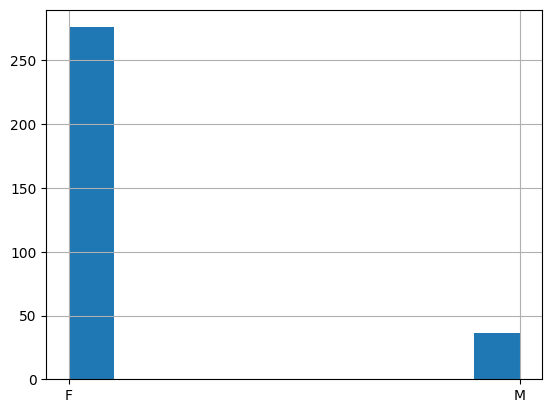

In [172]:
# Graficar Histograma de Sex
df_cirrhosis['Sex'].hist()

Revisando los datos, se nota una gran diferencia entre hombres y mujeres en la distribución, al tener una mayoria de mujeres significativa, se revisara con negocio si se mantiene o elimina la columna, y si queremos hacer solo predicciones con mujeres, de igual manera habrá que revisar la correlación de esta con el campo, para ver si realmente es significativa, lo cual se vera más adelante.

### Eliminar columnas no necesarias

#### Declarar clase para eliminar

In [173]:
class eliminadorDeColumnas:
    def __init__(self,df):
        self.df = df.copy()

    def eliminar_columnas(self,columnas_a_eliminar):
        self.df = self.df.drop(columns=columnas_a_eliminar)
        return self.df
    
    def get_df(self):
        return self.df

#### Eliminar columna ID

In [174]:
# Se eliminan columnas del dataframe que no aportan valor al análisis
eliminador_df_cirrhosis = eliminadorDeColumnas(df_cirrhosis)
df_cirrhosis = eliminador_df_cirrhosis.eliminar_columnas(['ID'])
df_cirrhosis.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


#### Guardar el dataframe csv con los datos limpios para procesarlo con dvc

In [175]:
cirrhosis_df_clean_saver.save_to_csv(df_cirrhosis)

 El df se guardo exitosamente como csv en el archivo ./data/cirrhosis_clean.csv


#### Analysis de la columna Age

Se observo que la columna Age esta representada en dias, por lo cual está se va a convertir a años, truncando al valor inferior.

In [176]:
# Se convierte la variable "Age" a años
df_cirrhosis["Age"] = df_cirrhosis["Age"]//365
df_cirrhosis.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


#### Guardar el dataframe a csv con los datos limpios para procesarlo con dvc

In [177]:
df_cirrhosis.head()
cirrhosis_df_clean_saver.save_to_csv(df_cirrhosis)

 El df se guardo exitosamente como csv en el archivo ./data/cirrhosis_clean.csv


### Analysis univariado de variables numericas

#### Representación de histogrmas para visualizar las distirbuciones

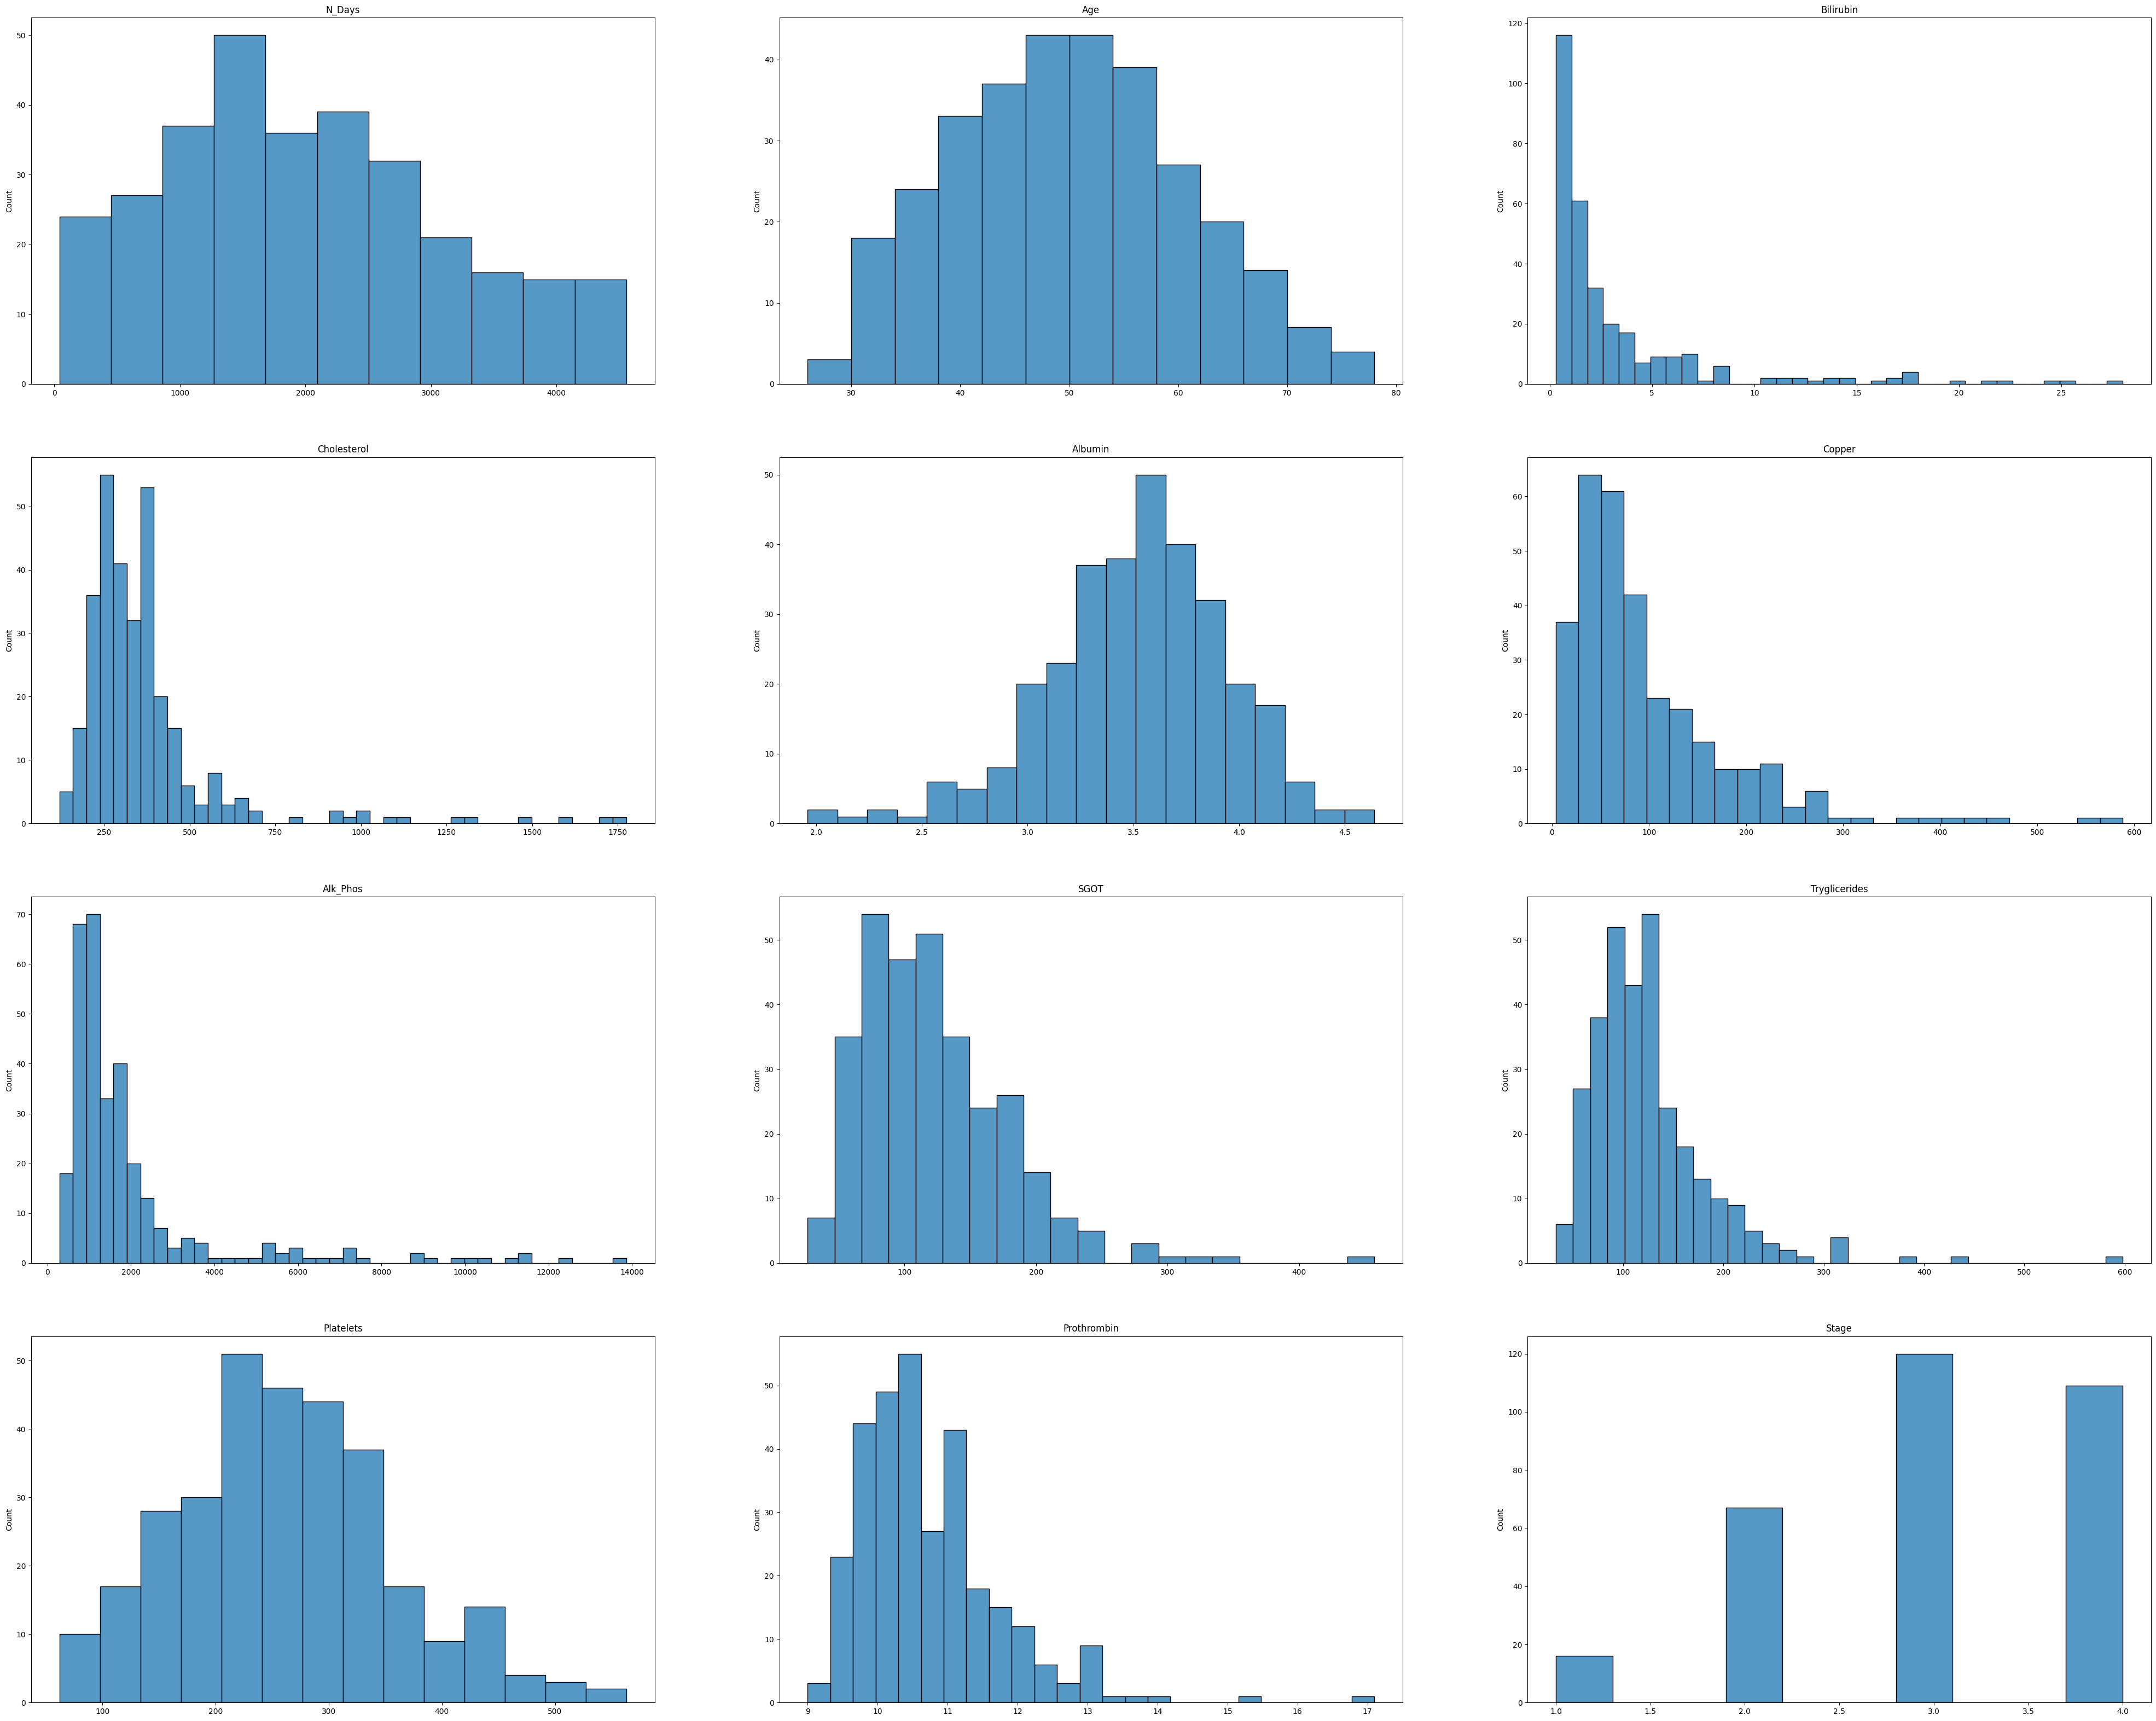

In [178]:
# Se evalúa si las variables númericas requieren alguna transformación
cat_con = df_cirrhosis.select_dtypes(include="number").columns.tolist()

fig, axes = plt.subplots(4,3, figsize=(50,40))
axes = axes.ravel()
for col, ax in zip(df_cirrhosis[cat_con], axes):
  sns.histplot(x=df_cirrhosis[col], ax=ax)
  ax.set(title=f'{col}', xlabel=None)

Observando los histogramas, podemos ver que hay algunas variables que cuentan con distribuciones no homogeneas, por lo que muy probablemente, exitan outlieres y debamos hacer alguna transformación para estas variables.Algunas de estas variables son Bilirubin, Cholesterol, Copper, Alk_Phos, SGOT, tryglicerides, Prothrombin. 

#### Diagramas de caja de variables numericas

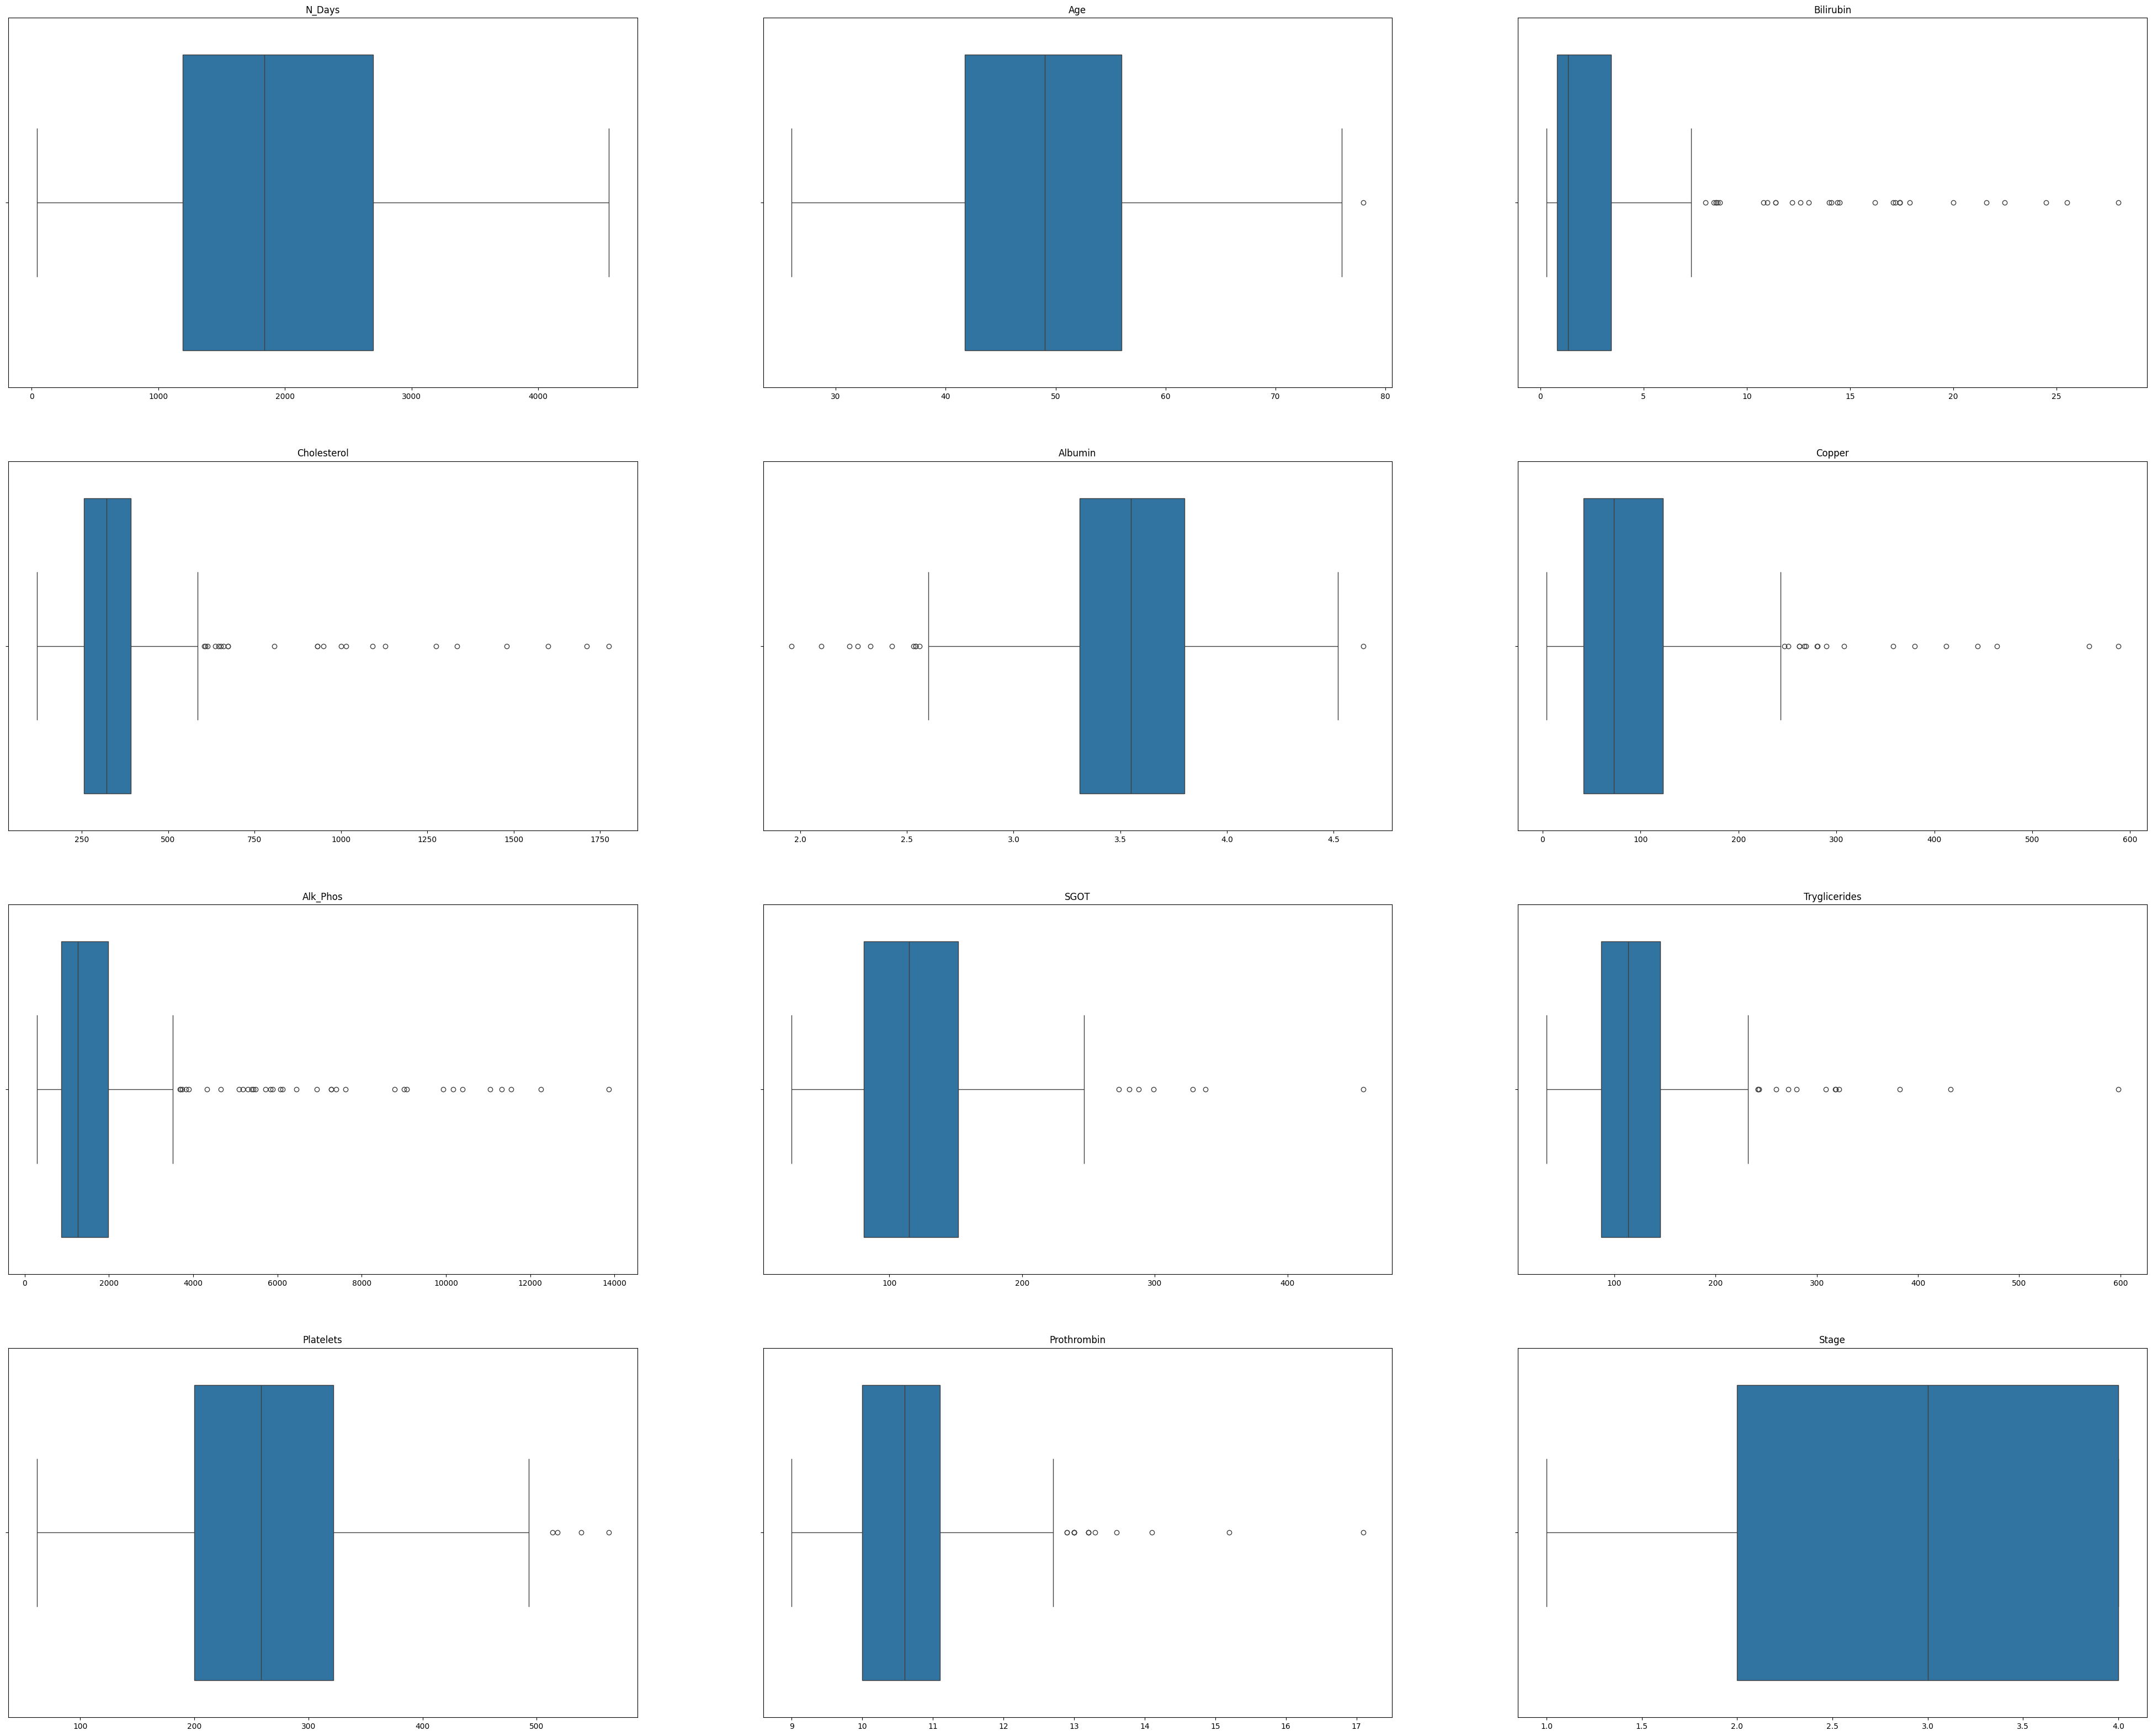

In [179]:
def boxplot(df):

  cat_con = df.select_dtypes(include="number").columns.tolist()

  fig, axes = plt.subplots(4,3, figsize=(50,40))
  axes = axes.ravel()
  for col, ax in zip(df[cat_con], axes):
    sns.boxplot(x=df[col], ax=ax)
    ax.set(title=f'{col}', xlabel=None)

boxplot(df_cirrhosis)


Notamos que efectivamente las variables mencionadas tienen outliers, por lo que vamos a remover algunos de los outliers encontrados. Pero viendo la tendencias de las curvas, haremos alguna transformación más adelante para trabajar con eso y posteriormente evaluar si hay que procesar algo.

### Analysis univariado de variables categoricas

#### Hacemos el countplot de las variables categoricas

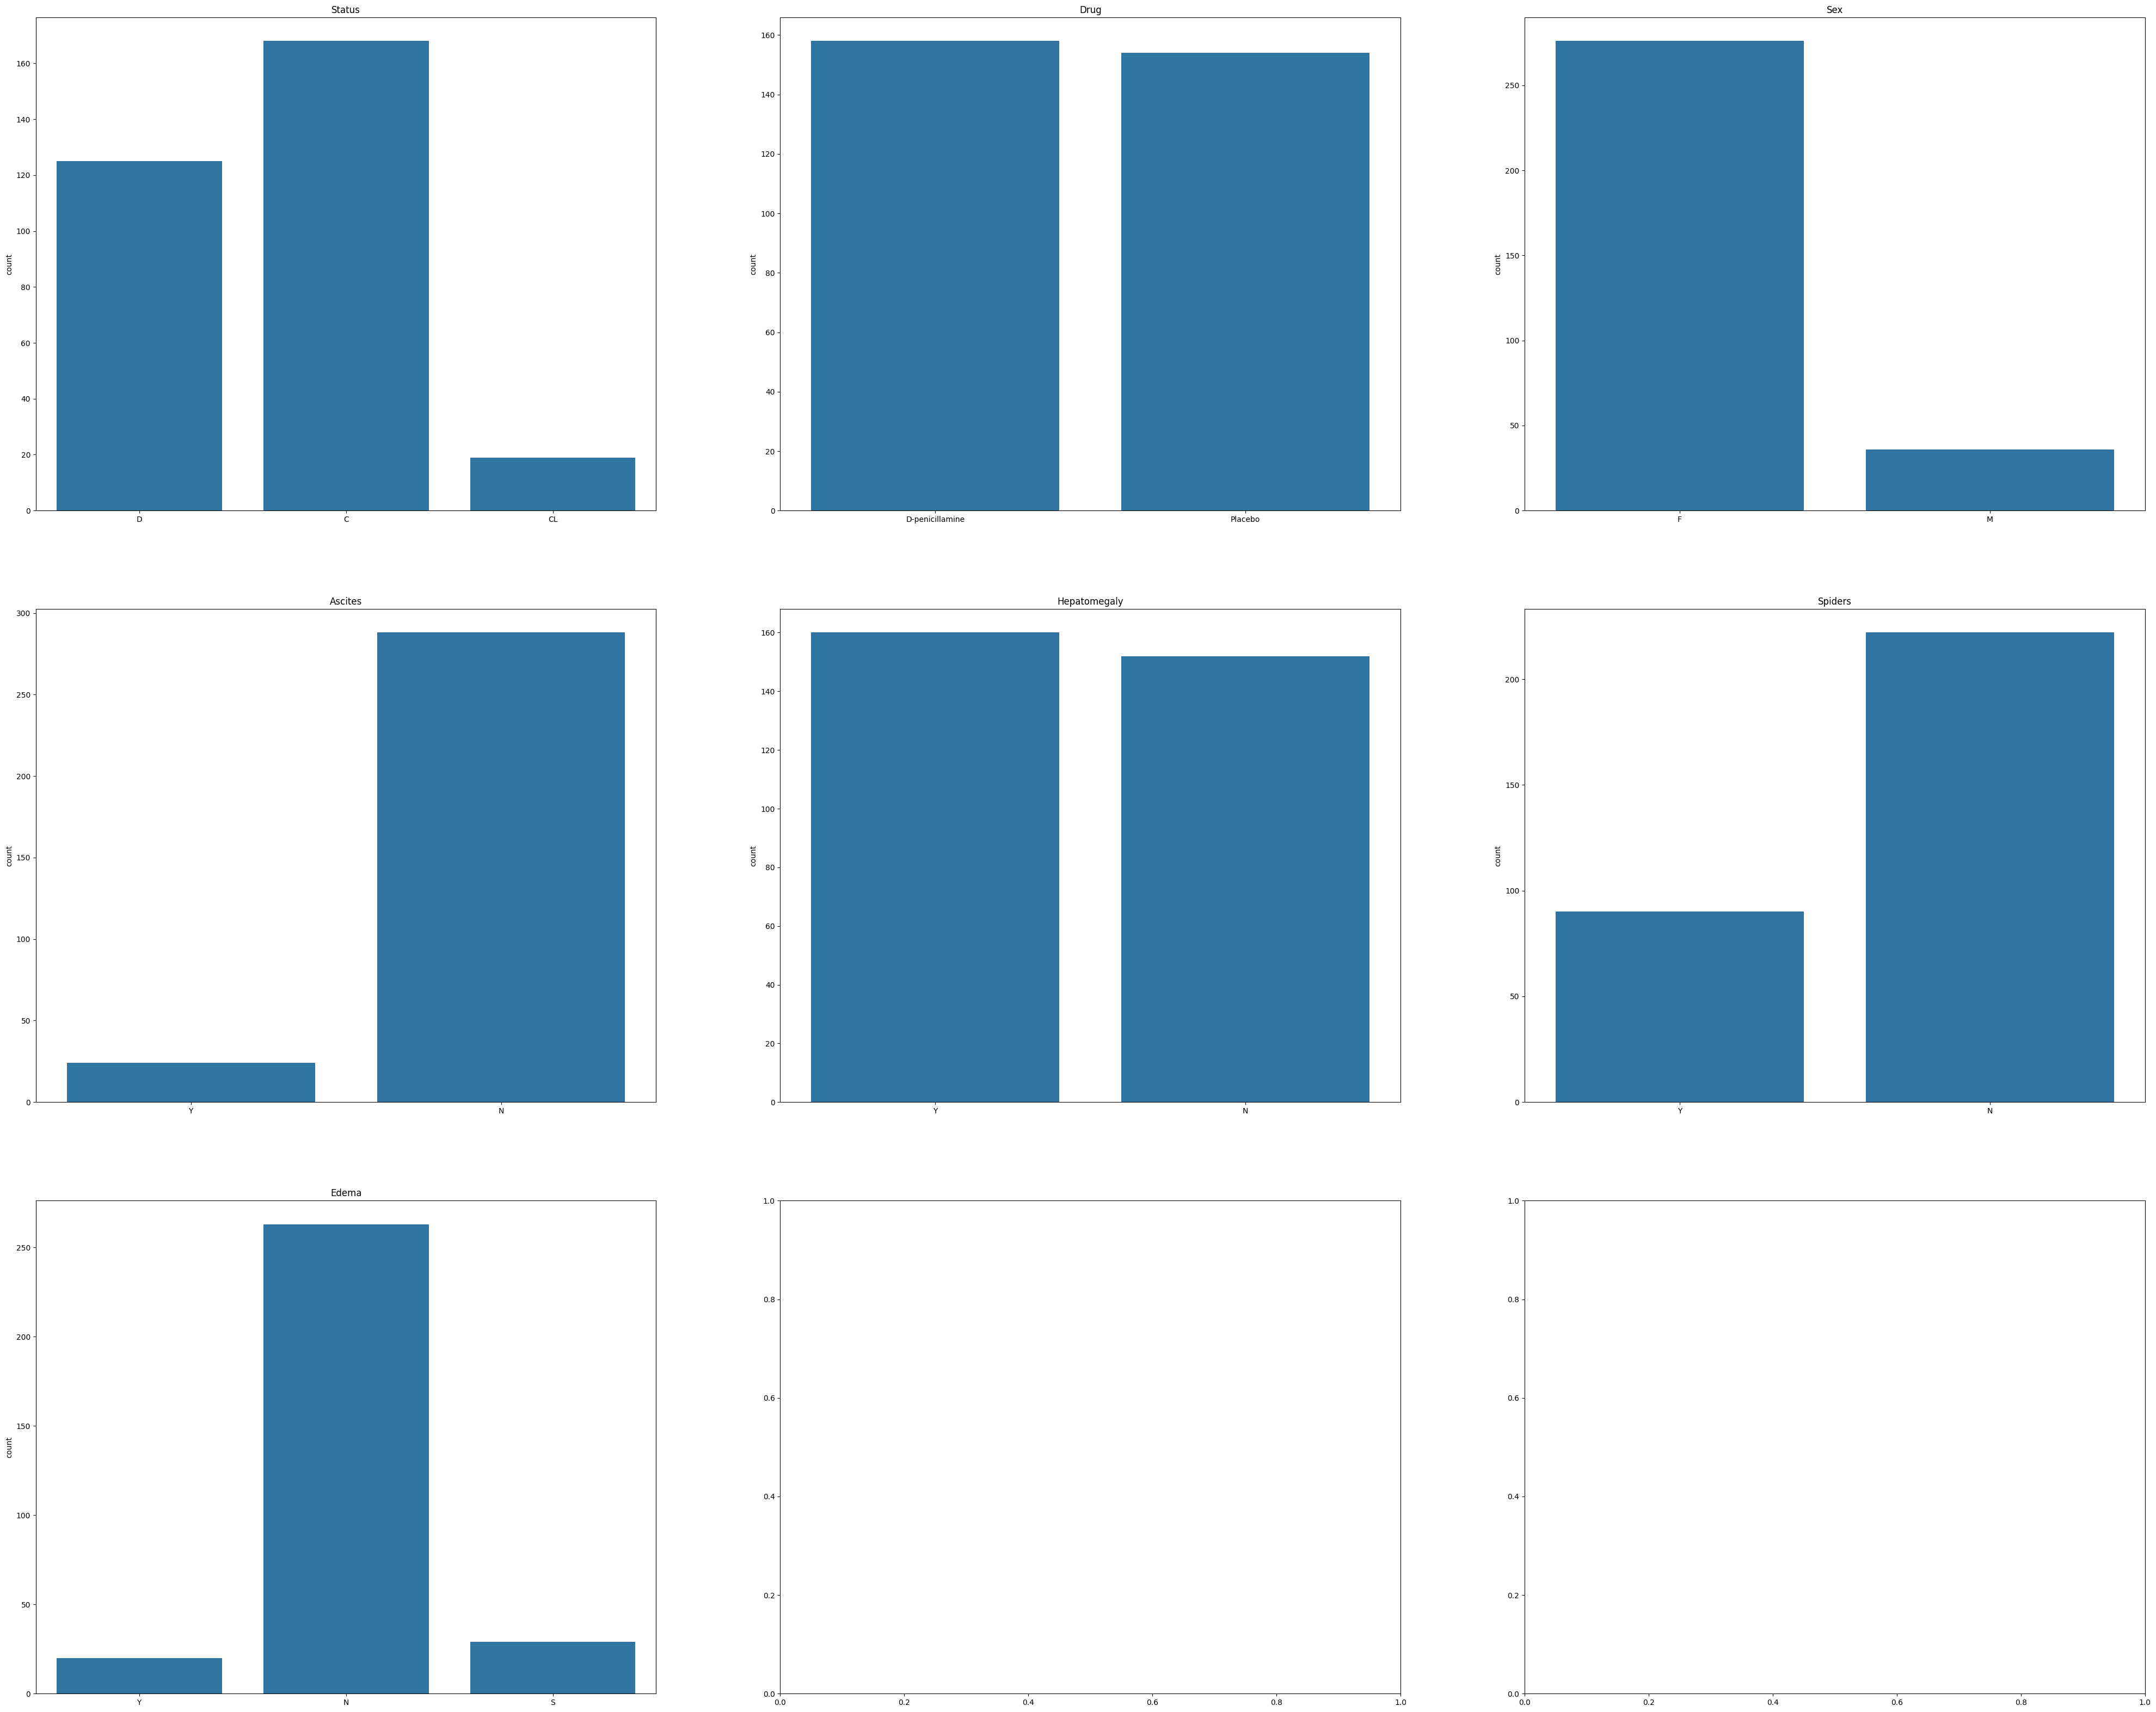

In [198]:
cat_con = df_cirrhosis.select_dtypes(include="object").columns.tolist()

fig, axes = plt.subplots(3,3, figsize=(50,40))
axes = axes.ravel()
for col, ax in zip(df_cirrhosis[cat_con], axes):
  sns.countplot(x=df_cirrhosis[col], ax=ax)
  ax.set(title=f'{col}', xlabel=None)

Observamos que las variables categoricas, están muy distintas en valores, por lo que valdría la pena verificar cuales si están realmente relacionadas con el valor a predecir.

### Analysis multivariado de variables numericas

In [ ]:
df_cirrhosis.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [14]:
#
variables = ["Bilirubin","Prothrombin"]
df[variables] = np.log(df[variables])

array([[<Axes: title={'center': 'Bilirubin'}>,
        <Axes: title={'center': 'Prothrombin'}>]], dtype=object)

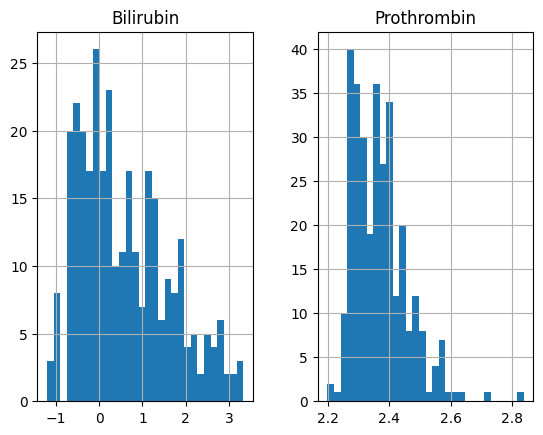

In [15]:
df[variables].hist(bins=30)

In [17]:
df.to_csv('cirrhosis_vMod.csv', index=True)